In [1]:
# importing the libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reding the dataset 
train_data = pd.read_csv('train.csv')
pred_data = pd.read_csv('test.csv')
print(train_data.head())
print(pred_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [3]:
passengerId = np.array(pred_data['PassengerId'])

In [4]:
# checking if values are nan in any column of the dataset
print(train_data.isnull().sum())#total number of nan values in column
print("    ")
print(pred_data.isnull().sum())
# there are a lot of missing values in cabin this column so we are going to drop this column for creating the model

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
    
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [5]:
# droppimg the columns which i thought would be of no use or having a large number of nan values
train_data = train_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
print(train_data.head())
pred_data = pred_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
print(pred_data.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5      0      0   7.8292        Q
1       3  female  47.0      1      0   7.0000        S
2       2    male  62.0      0      0   9.6875        Q
3       3    male  27.0      0      0   8.6625        S
4       3  female  22.0      1      1  12.2875        S


In [6]:
# we can't drop age column so we filled it with mean value otherwise dropping rows corresponding to nan values would result in loss of a lot of data
# for training set
mean_value = train_data['Age'].mean()
train_data['Age'].fillna(value=mean_value,inplace=True)
# for prediction set
mean_value = pred_data['Age'].mean()
pred_data['Age'].fillna(value=mean_value,inplace=True)

In [7]:
# filling one nan value with the mean in the pred set
mean_value = pred_data['Fare'].mean()
pred_data['Fare'].fillna(value=mean_value,inplace=True)

In [8]:
# checking for nan values again
print(train_data.isnull().sum())
print("       ")
print(pred_data.isnull().sum())
pred_data

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64
       
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [9]:
# we can drop 2 rows as they are having nan values in embarked column 
train_data = train_data.dropna(axis=0)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [10]:
# separating y_train from the dataset as it is not having the categorical variables
train_X_data = train_data.iloc[:,1:]
y = np.array(train_data['Survived'])
train_X_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct_train = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,-1])], remainder='passthrough')
train_X_data = np.array(ct_train.fit_transform(train_X_data))
ct_pred = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,-1])], remainder='passthrough')
pred_data = np.array(ct_pred.fit_transform(pred_data))

In [12]:
train_X_data = pd.DataFrame(train_X_data)
print(train_X_data.head(),"     ")
pred_data = pd.DataFrame(pred_data)
print(pred_data.head())

     0    1    2    3    4    5    6    7     8    9   10       11
0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  22.0  1.0  0.0   7.2500
1  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  38.0  1.0  0.0  71.2833
2  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  26.0  0.0  0.0   7.9250
3  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  35.0  1.0  0.0  53.1000
4  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  35.0  0.0  0.0   8.0500      
     0    1    2    3    4    5    6    7     8    9   10       11
0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  34.5  0.0  0.0   7.8292
1  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  47.0  1.0  0.0   7.0000
2  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  62.0  0.0  0.0   9.6875
3  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  27.0  0.0  0.0   8.6625
4  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  22.0  1.0  1.0  12.2875


In [13]:
train_X_data = np.array(train_X_data)
train_X_data
X_pred = np.array(pred_data)
X_pred

array([[ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.8292],
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  0.    ,  7.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  9.6875],
       ...,
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.25  ],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  1.    , 22.3583]])

In [14]:
for i in range(y.shape[0]):
    if y[i]==0:
        y[i] = -1

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X_data,y,test_size=0.01,random_state=1)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(pred_data.shape)

(880, 12)
(880,)
(9, 12)
(9,)
(418, 12)


##### X_TRAIN AND Y_TRAIN ARE HERE. NOW WE HAVE TO APPLY SVM ALGORITHM TO CREATE A MODEL

In [17]:
X_train = np.concatenate((np.ones((880,1)),X_train),axis=1)
X_test = np.concatenate((np.ones((9,1)),X_test),axis=1)
X_pred = np.concatenate((np.ones((X_pred.shape[0],1)),X_pred),axis=1)
X_pred = X_pred.T
X_train = X_train.T 
X_test = X_test.T
y_train = y_train.reshape((1,880))
y_test = y_test.reshape((1,9))

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13, 880)
(13, 9)
(1, 880)
(1, 9)


#####  TRYING FOR SVM ALGORITHM

In [19]:
def func(W,X):
    return np.dot(W,X)

In [20]:
def compute_cost(W,X,y,lambd=0):
    m = y.shape[1]
    cost = (lambd/2)*np.square(np.linalg.norm(W)) + np.sum(np.maximum(np.zeros((1,m)), 1 - np.multiply(y, func(W,X))))
    return cost

In [21]:
def grads(W,X,y,lambd=0):
    m = y.shape[1]
    W_term_grad = lambd*W
    max_term_grad = np.zeros((1, X.shape[0]))
    for i in range(m):
        if 1 - y[:,i]*np.dot(W,X[:,i]) > 0:
            max_term_grad = max_term_grad - y[:,i]*X[:,i]
    grad = W_term_grad + max_term_grad
    return grad

In [22]:
def predict(W,X,lambd=0):
    model_output = func(W,X)
    m = X.shape[1]
    for i in range(m):
        if model_output[0,i]>=0:
            model_output[0,i] = 1
        else:
            model_output[0,i] = -1
    return model_output


In [23]:
def accuracy(pred, true_labels):
    m = true_labels.shape[1]
    acc = np.sum(pred==true_labels)
    return acc/m

In [24]:
def model(X, y, num_epochs, lr,c, lambd=0):
    costs = []
    n = X.shape[0]
    m = X.shape[1]
    W = np.zeros((1,n), dtype=np.float64)*c
    for epoch in range(num_epochs):
        model_output = func(W,X)
        grad = grads(W,X,y,lambd)
        W = W - lr*grad
        if epoch%100==0:
            cost = compute_cost(W,X,y,lambd)
            costs.append(cost)
            print("Loss after ", epoch, " iterations is ",cost, ", train_acc ",accuracy(predict(W,X,lambd), y))
    plt.plot(np.arange(len(costs)),costs)
    plt.title("Loss vs num_iterations graph")
    plt.xlabel("Number of iterations (per hundred)")
    plt.ylabel("Loss")
    plt.show()
    return W

Loss after  0  iterations is  814.1258274152975 , train_acc  0.6818181818181818
Loss after  100  iterations is  634.6551264344951 , train_acc  0.675
Loss after  200  iterations is  625.7661097376496 , train_acc  0.6875
Loss after  300  iterations is  617.0500731611863 , train_acc  0.6909090909090909
Loss after  400  iterations is  608.5425672926611 , train_acc  0.6954545454545454
Loss after  500  iterations is  600.280205306746 , train_acc  0.7
Loss after  600  iterations is  592.236352183382 , train_acc  0.7011363636363637
Loss after  700  iterations is  584.6858528982546 , train_acc  0.6988636363636364
Loss after  800  iterations is  577.1389251832705 , train_acc  0.7011363636363637
Loss after  900  iterations is  570.0634161166315 , train_acc  0.7056818181818182
Loss after  1000  iterations is  563.8341634060699 , train_acc  0.7079545454545455
Loss after  1100  iterations is  557.8015936033627 , train_acc  0.7079545454545455
Loss after  1200  iterations is  552.1326018774649 , train

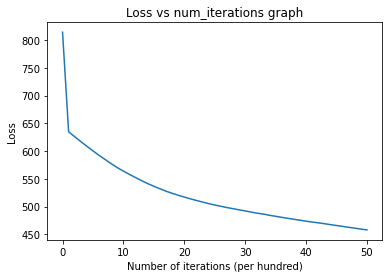

In [25]:
W = model(X_train, y_train, num_epochs=5001, lr = 1e-6, c=0.001, lambd=10)

In [26]:
accuracy(predict(W,X_test,lambd=10),y_test)

1.0

In [27]:
pred = predict(W,X_pred,lambd=10).astype(np.int64)
m = X_pred.shape[1]
for i in range(m):
    if pred[0,i]==-1:
        pred[0,i]=0
passengerId = passengerId.reshape((1,pred.shape[1]))
ans = pd.DataFrame(np.concatenate((passengerId.T,pred.T),axis=1))
ans.columns = ['PassengerId','Survived']

In [28]:
ans.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [30]:
submission = ans.to_csv("Submission.csv")

##### For more accuarcy we can add kernel trick to it 